In [1]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 183.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 35.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 93.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 93.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 98.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 83.0 MB/s eta 0:00:00


In [2]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()

--2025-04-10 13:23:24--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  71.8MB/s    in 2.1s    

2025-04-10 13:23:27 (71.8 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [3]:
!pip install seaborn
import seaborn as sns

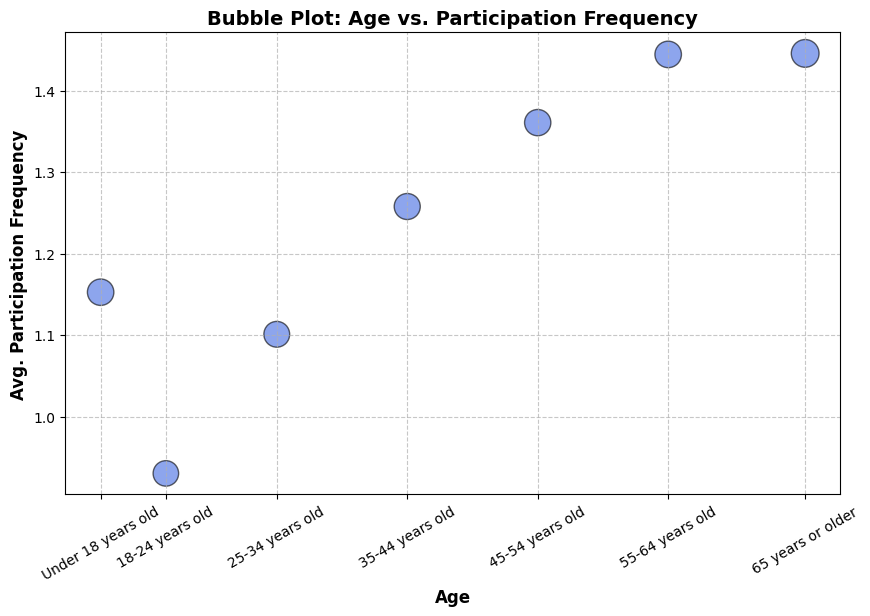

In [4]:
#1. Bubble Plot for Age vs. Frequency of Participation
df1 = df[["Age", "SOPartFreq", "JobSat"]].copy()
age_mapping = { "Under 18 years old": 16, "18-24 years old": 21, "25-34 years old": 29.5, "35-44 years old": 39.5, "45-54 years old": 49.5, "55-64 years old": 59.5, "65 years or older": 70 }
so_part_freq_mapping = { "I have never participated in Q&A on Stack Overflow": 0, "Less than once per month or monthly": 1, "A few times per month or weekly": 2, "A few times per week": 3, "Daily or almost daily": 4, "Multiple times per day": 5 }
df1["AgeNumeric"] = df1["Age"].map(age_mapping)
df1["SOPartFreqNumeric"] = df1["SOPartFreq"].map(so_part_freq_mapping)
df1["JobSat"] = pd.to_numeric(df1["JobSat"], errors="coerce")
df_filtered1 = df1.dropna(subset=["AgeNumeric", "SOPartFreqNumeric", "JobSat"])
df_bubble = df_filtered1.groupby("AgeNumeric").agg( {"SOPartFreqNumeric": "mean", "JobSat": "mean"} ).reset_index()
plt.figure(figsize=(10, 6))
plt.scatter(df_bubble["AgeNumeric"],df_bubble["SOPartFreqNumeric"], s=df_bubble["JobSat"] * 50, alpha=0.6, color="royalblue", edgecolors="black")
plt.xlabel("Age", fontsize=12, fontweight="bold")
plt.ylabel("Avg. Participation Frequency", fontsize=12, fontweight="bold")
plt.title("Bubble Plot: Age vs. Participation Frequency", fontsize=14, fontweight="bold")
plt.xticks(df_bubble["AgeNumeric"], labels=age_mapping.keys(), rotation=30)
plt.grid(True, linestyle="--", alpha=0.7) 
plt.show()

NameError: name 'bubble' is not defined

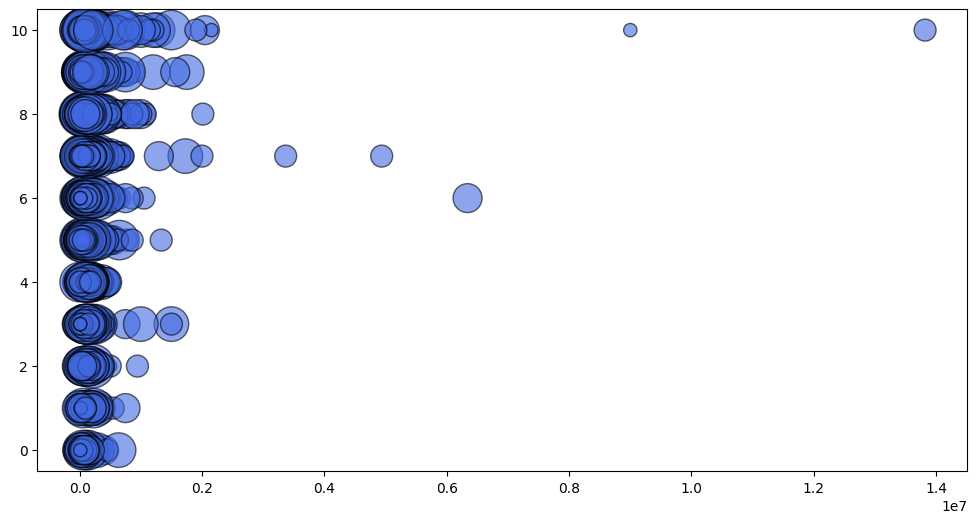

In [5]:
#2. Bubble Plot for Compensation vs. Job Satisfaction
age_mapping = { "Under 18 years old": 16, "18-24 years old": 21, "25-34 years old": 29.5, "35-44 years old": 39.5, "45-54 years old": 49.5, "55-64 years old": 59.5, "65 years or older": 70 }
df["AgeNumeric"] = df["Age"].map(age_mapping)
df["ConvertedCompYearly"] = pd.to_numeric(df["ConvertedCompYearly"], errors="coerce")
df["JobSat"] = pd.to_numeric(df["JobSat"], errors="coerce")
df_bubble = df[["ConvertedCompYearly", "JobSat", "AgeNumeric"]].dropna()
df_bubble["BubbleSize"] = (
    (df_bubble["AgeNumeric"] - df_bubble["AgeNumeric"].min()) /
    (df_bubble["AgeNumeric"].max() - df_bubble["AgeNumeric"].min()) * 1000
)
plt.figure(figsize=(12, 6))
sc = plt.scatter(df_bubble["ConvertedCompYearly"], df_bubble["JobSat"], 
s=df_bubble["BubbleSize"], alpha=0.6, color="royalblue", edgecolors="black")
legend_sizes = [20, 40, 60, 80]
plt.scatter([], [], s=bubble, color="royalblue", edgecolors="black", label=f"Age {size}")
plt.legend(title="Bubble Size (Age)", loc="lower right", fontsize=10)
plt.xlabel("Yearly Compensation (USD)", fontsize=12, fontweight="bold")
plt.ylabel("Job Satisfaction", fontsize=12, fontweight="bold")
plt.title("Bubble Plot of Compensation vs. Job Satisfaction", fontsize=14, fontweight="bold") 
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
plt.xscale("log")
plt.show()

/tmp/ipykernel_337/833990450.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bubble_data = df_exploded.groupby(['AgeGroup', 'LanguageHaveWorkedWith']).size().reset_index(name='Count')


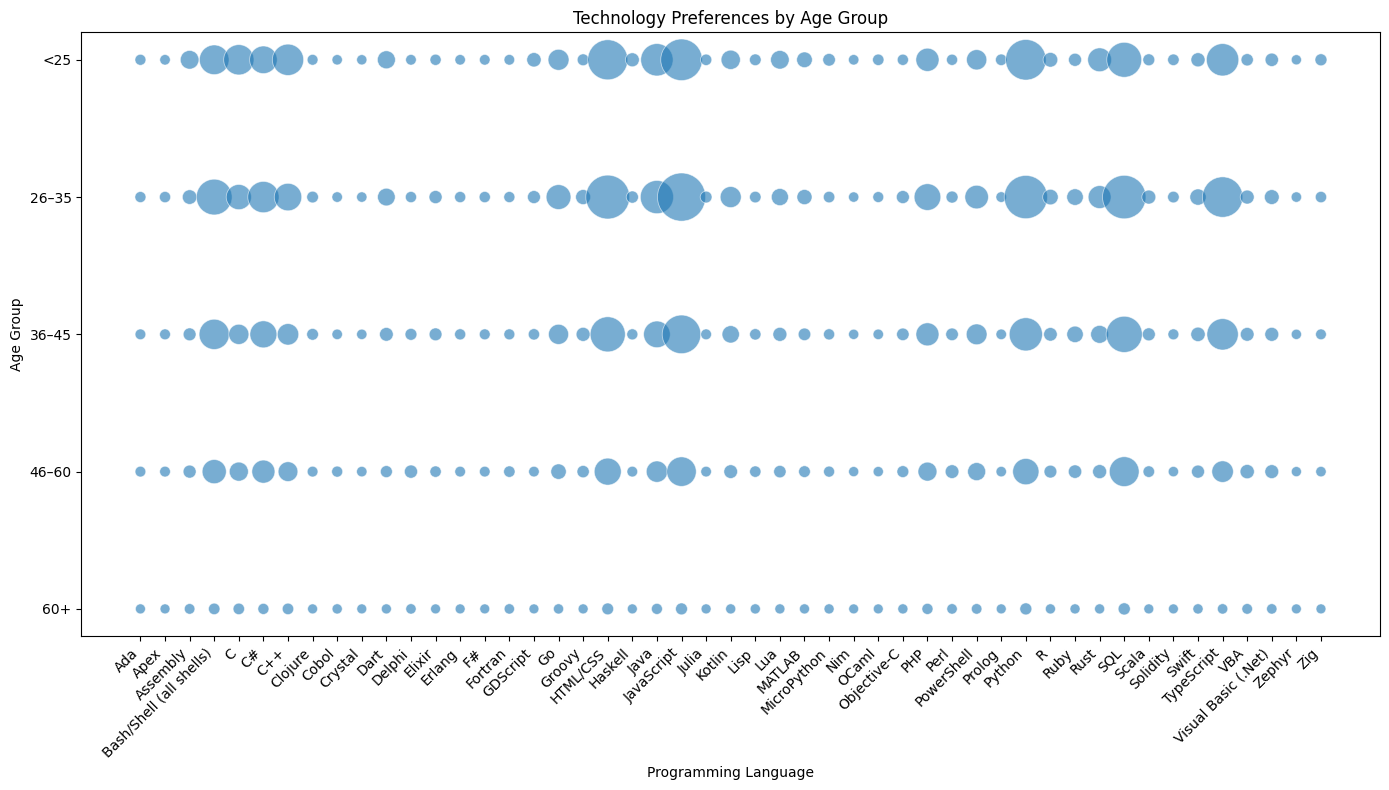

In [6]:
#1. Bubble Plot of Technology Preferences by Age
df_exploded = df.copy()
df_exploded = df_exploded.dropna(subset=['Age', 'LanguageHaveWorkedWith'])
df_exploded['LanguageHaveWorkedWith'] = df_exploded['LanguageHaveWorkedWith'].str.split(';')
df_exploded = df_exploded.explode('LanguageHaveWorkedWith')

df_exploded['AgeGroup'] = pd.cut(df_exploded['AgeNumeric'], bins=[0, 25, 35, 45, 60, 100], labels=['<25', '26–35', '36–45', '46–60', '60+'])

bubble_data = df_exploded.groupby(['AgeGroup', 'LanguageHaveWorkedWith']).size().reset_index(name='Count')

plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=bubble_data,
    x='LanguageHaveWorkedWith',
    y='AgeGroup',
    size='Count',
    legend=False,
    alpha=0.6,
    sizes=(50, 1200)
)
plt.xticks(rotation=45, ha='right')
plt.title('Technology Preferences by Age Group')
plt.xlabel('Programming Language')
plt.ylabel('Age Group')
plt.tight_layout()
plt.show()

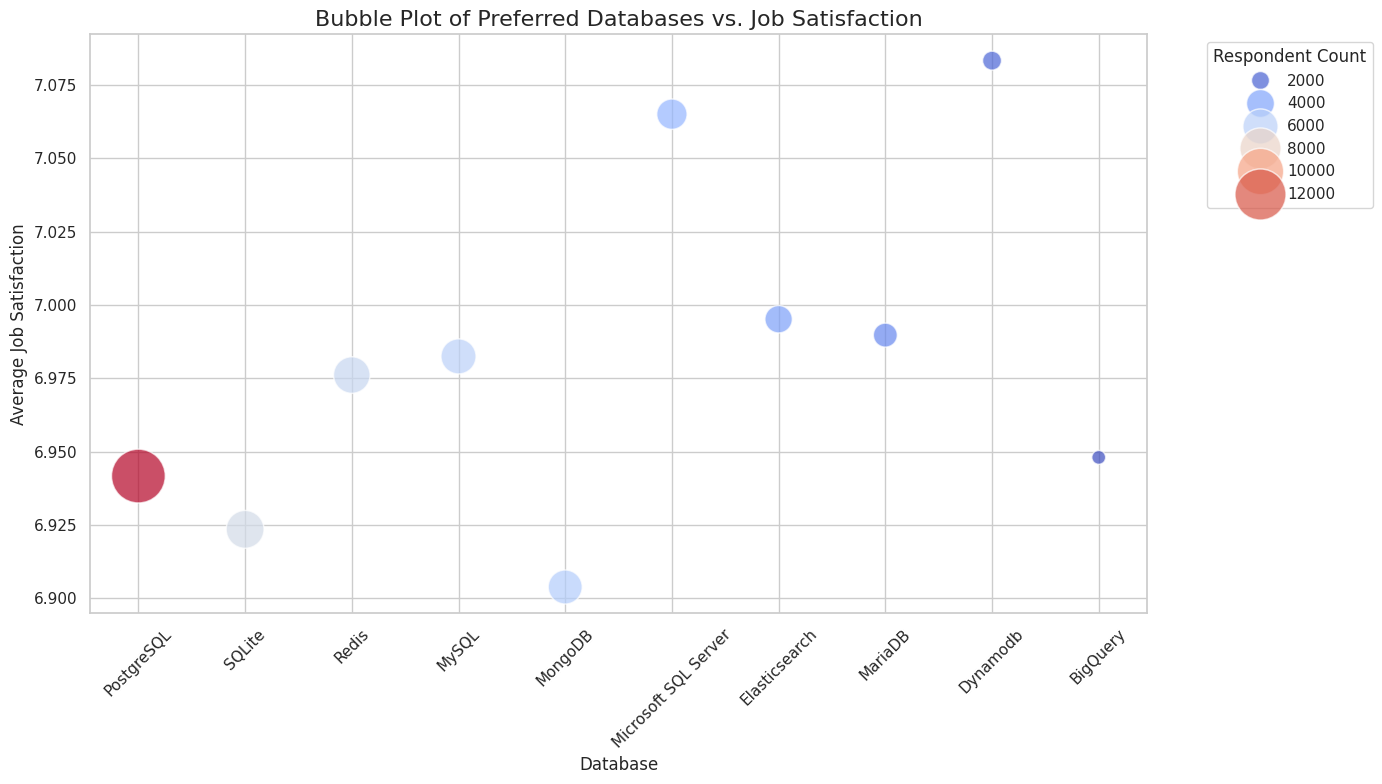

In [7]:
#2. Bubble Plot for Preferred Databases vs. Job Satisfaction
df_db = df[["DatabaseWantToWorkWith", "JobSat"]].dropna()

df_db["Database"] = df_db["DatabaseWantToWorkWith"].str.split(';')
df_db = df_db.explode("Database")

bubble_data = df_db.groupby("Database").agg(
    RespondentCount=('Database', 'count'),
    AvgJobSat=('JobSat', lambda x: pd.to_numeric(x, errors='coerce').mean())
).reset_index()

top_dbs = bubble_data.sort_values("RespondentCount", ascending=False).head(10)


plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

bubble = sns.scatterplot(
    data=top_dbs,
    x="Database",
    y="AvgJobSat",
    size="RespondentCount",
    sizes=(100, 1500),
    hue="RespondentCount",
    palette="coolwarm",
    alpha=0.7,
    legend="brief"
)


plt.title("Bubble Plot of Preferred Databases vs. Job Satisfaction", fontsize=16)
plt.xlabel("Database", fontsize=12)
plt.ylabel("Average Job Satisfaction", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Respondent Count", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

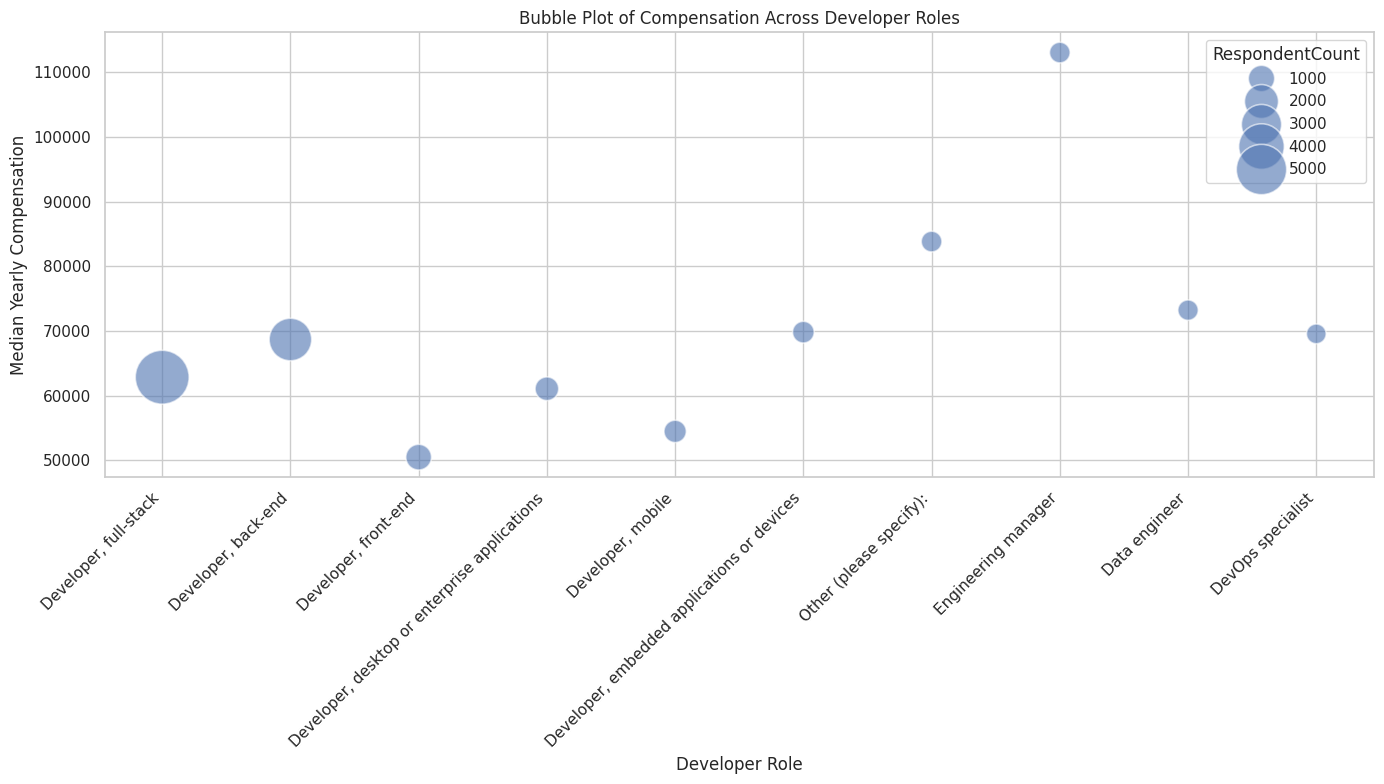

In [8]:
#1. Bubble Plot for Compensation Across Developer Roles
df_dev = df[['DevType', 'ConvertedCompYearly', 'JobSat']].dropna()
df_dev['DevType'] = df_dev['DevType'].str.split(';')
df_dev = df_dev.explode('DevType')

# Optional: Clean whitespace
df_dev['DevType'] = df_dev['DevType'].str.strip()

# Aggregate data
bubble_data = df_dev.groupby('DevType').agg({
    'ConvertedCompYearly': 'median',
    'JobSat': 'count'  # You could also use 'mean' of JobSat if you converted it to numeric
}).reset_index().rename(columns={'JobSat': 'RespondentCount'})

# Sort and limit to top 10 roles for clarity
bubble_data = bubble_data.sort_values(by='RespondentCount', ascending=False).head(10)

# Plot
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=bubble_data,
    x='DevType',
    y='ConvertedCompYearly',
    size='RespondentCount',
    alpha=0.6,
    legend='brief',
    sizes=(200, 1500)
)
plt.title('Bubble Plot of Compensation Across Developer Roles')
plt.ylabel('Median Yearly Compensation')
plt.xlabel('Developer Role')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

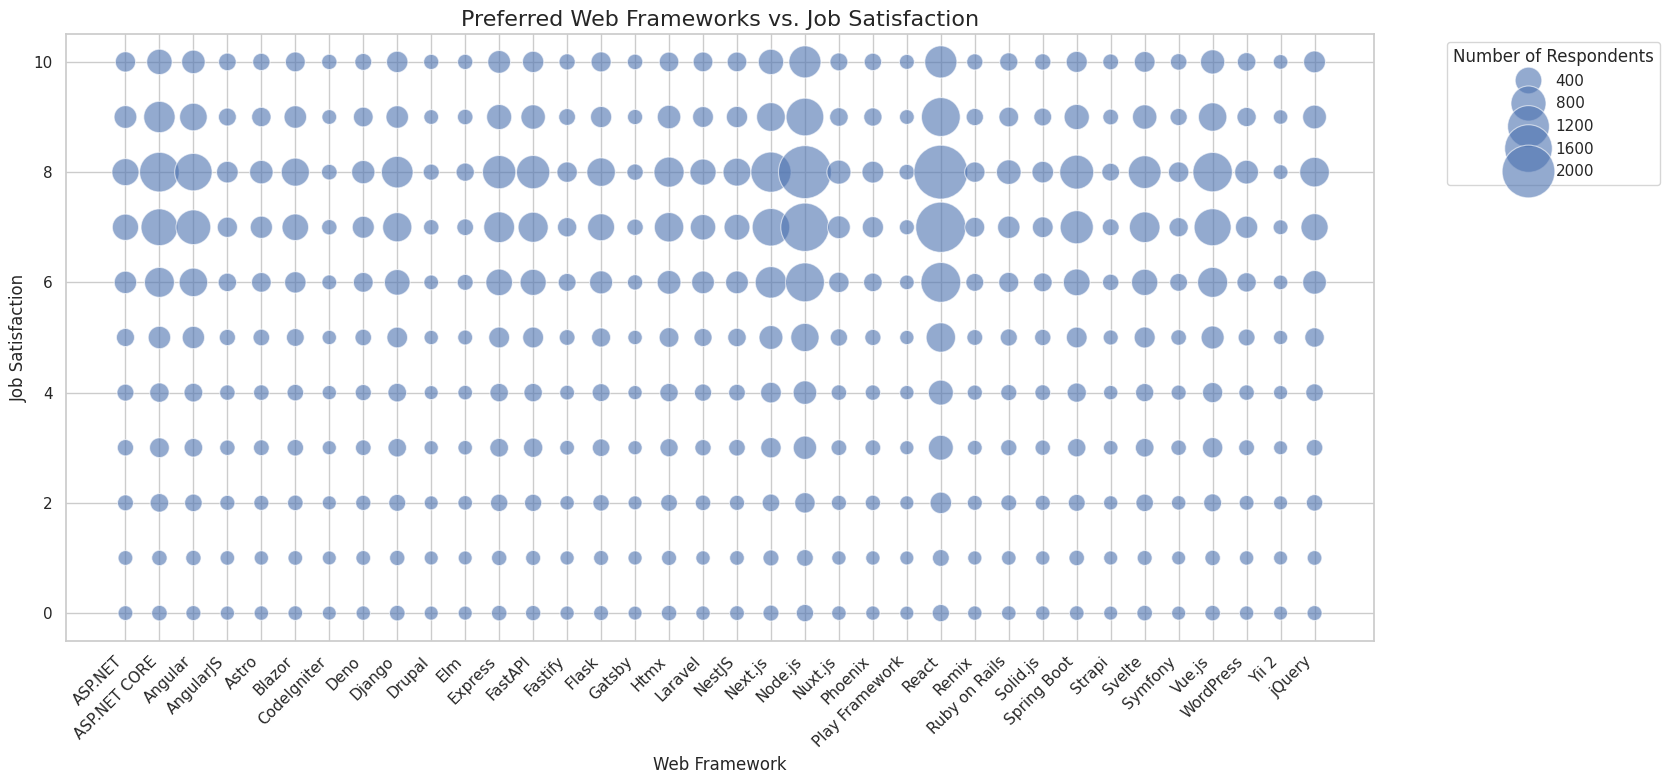

In [9]:
#1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction
df_bubble = df[["WebframeWantToWorkWith", "JobSat"]].dropna()


df_bubble["WebframeWantToWorkWith"] = df_bubble["WebframeWantToWorkWith"].str.split(";")
df_bubble = df_bubble.explode("WebframeWantToWorkWith")


grouped = df_bubble.groupby(["WebframeWantToWorkWith", "JobSat"]).size().reset_index(name="Frequency")


plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

bubble = sns.scatterplot(
    data=grouped,
    x="WebframeWantToWorkWith",
    y="JobSat",
    size="Frequency",
    sizes=(100, 1500),
    alpha=0.6,
    legend="brief"
)


plt.title("Preferred Web Frameworks vs. Job Satisfaction", fontsize=16)
plt.xlabel("Web Framework", fontsize=12)
plt.ylabel("Job Satisfaction", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.legend(title="Number of Respondents", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

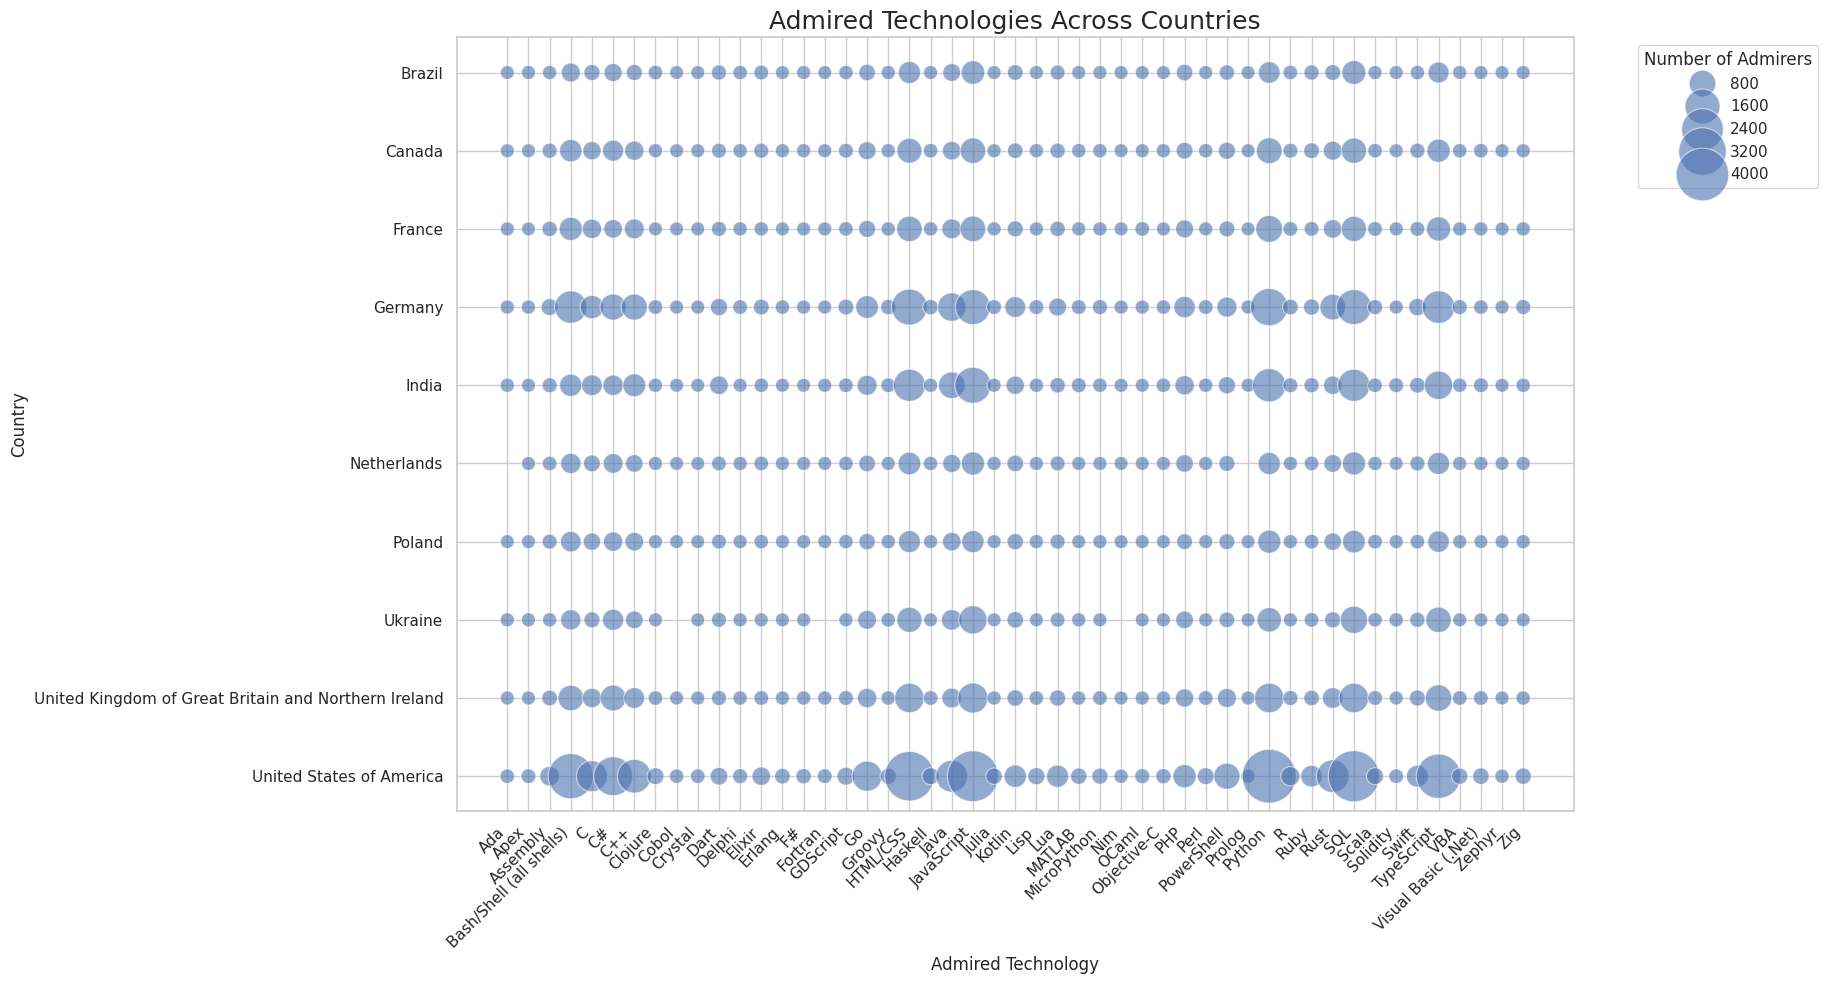

In [10]:
#2. Bubble Plot for Admired Technologies Across Countries
df_bubble = df[["LanguageAdmired", "Country"]].dropna()

df_bubble["LanguageAdmired"] = df_bubble["LanguageAdmired"].str.split(";")
df_bubble = df_bubble.explode("LanguageAdmired")

grouped = df_bubble.groupby(["Country", "LanguageAdmired"]).size().reset_index(name="Frequency")

top_countries = df_bubble["Country"].value_counts().nlargest(10).index
grouped = grouped[grouped["Country"].isin(top_countries)]


plt.figure(figsize=(16, 10))
sns.set(style="whitegrid")

bubble = sns.scatterplot(
    data=grouped,
    x="LanguageAdmired",
    y="Country",
    size="Frequency",
    sizes=(100, 1500),
    alpha=0.6,
    legend="brief"
)

plt.title("Admired Technologies Across Countries", fontsize=18)
plt.xlabel("Admired Technology", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.legend(title="Number of Admirers", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

NameError: name 'size' is not defined

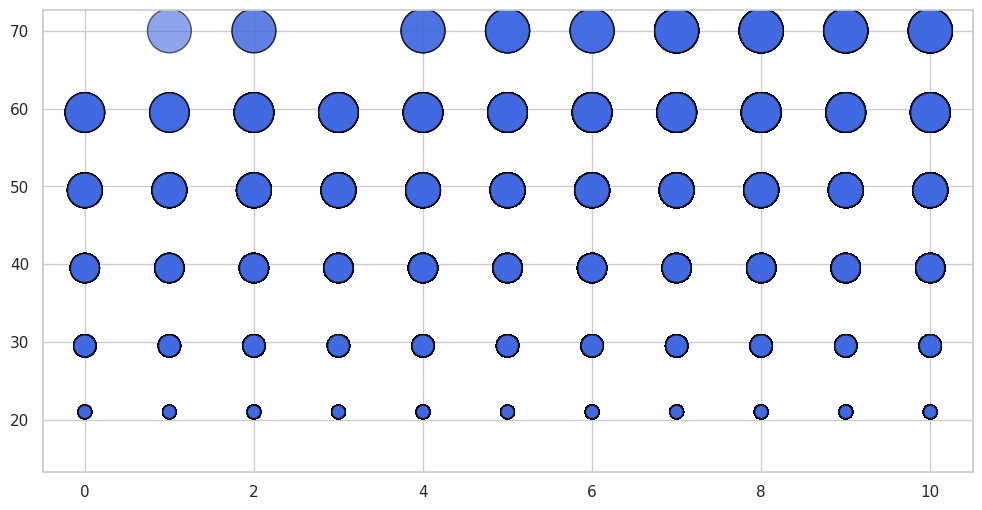

In [19]:
#2. Bubble Plot for Collaboration Tools by Age
age_mapping = { "Under 18 years old": 16, "18-24 years old": 21, "25-34 years old": 29.5, "35-44 years old": 39.5, "45-54 years old": 49.5, "55-64 years old": 59.5, "65 years or older": 70 }
df["AgeNumeric"] = df["Age"].map(age_mapping)
df["NEWCollabToolsHaveWorkedWith"] = pd.to_numeric(df["NEWCollabToolsHaveWorkedWith"], errors="coerce")
df["NEWCollabToolsHaveWorkedWith"] = pd.to_numeric(df["JobSat"], errors="coerce")
df_bubble = df[["AgeNumeric", "NEWCollabToolsHaveWorkedWith"]].dropna()
df_bubble["BubbleSize"] = (
    (df_bubble["AgeNumeric"] - df_bubble["AgeNumeric"].min()) /
    (df_bubble["AgeNumeric"].max() - df_bubble["AgeNumeric"].min()) * 1000
)
plt.figure(figsize=(12, 6))
sc = plt.scatter(df_bubble["NEWCollabToolsHaveWorkedWith"], df_bubble["AgeNumeric"], 
s=df_bubble["BubbleSize"], alpha=0.6, color="royalblue", edgecolors="black")
legend_sizes = [20, 40, 60, 80]
plt.scatter([], [], s=bubble, color="royalblue", edgecolors="black", label=f"Age {size(100,1500)}")
plt.legend(title="Bubble Size (Age)", loc="lower right", fontsize=10)
plt.xlabel("Collaboration Tools", fontsize=12, fontweight="bold")
plt.ylabel("AgeNumeric", fontsize=12, fontweight="bold")
plt.title("Collaboration Tools by Age", fontsize=14, fontweight="bold") 
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
plt.xscale("log")
plt.show()